<a href="https://colab.research.google.com/github/RandaAlsubaie/ny/blob/main/Copy_of_Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [65]:
df=pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [67]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [68]:
df.shape

(12316, 32)

In [69]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [70]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7302,6:07:00,Thursday,18-30,Male,NaN,Employee,NaN,Pick up upto 10Q,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Serious Injury
10488,19:00:00,Wednesday,31-50,Male,Junior high school,Employee,1-2yr,NaN,Owner,2-5yrs,...,Going straight,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
1724,12:32:00,Sunday,18-30,Male,Junior high school,Owner,Above 10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,Under 18,3,Employee,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8517,12:15:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Governmental,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
10848,14:57:00,Monday,Over 51,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Unknown,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury


In [71]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [72]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [73]:
df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [74]:

df['Type_of_collision'].mode()
df.fillna(df['Type_of_collision'].mode()[0],inplace=True)
df['Vehicle_movement'].mode()
df.fillna(df['Vehicle_movement'].mode()[0],inplace=True)
df['Educational_level'].mode()
df.fillna(df['Educational_level'].mode()[0],inplace=True)
df['Driving_experience'].mode()
df.fillna(df['Driving_experience'].mode()[0],inplace=True)
df['Owner_of_vehicle'].mode()
df.fillna(df['Owner_of_vehicle'].mode()[0],inplace=True)
df['Owner_of_vehicle'].mode()
df.fillna(df['Owner_of_vehicle'].mode()[0],inplace=True)
df['Area_accident_occured'].mode()
df.fillna(df['Area_accident_occured'].mode()[0],inplace=True)
df['Road_allignment'].mode()
df.fillna(df['Road_allignment'].mode()[0],inplace=True)
df['Types_of_Junction'].mode()
df.fillna(df['Types_of_Junction'].mode()[0],inplace=True)
df['Road_surface_type'].mode()
df.fillna(df['Road_surface_type'].mode()[0],inplace=True)
df['Type_of_vehicle'].mode()
df.fillna(df['Type_of_vehicle'].mode()[0],inplace=True)
df['Lanes_or_Medians'].mode()
df.fillna(df['Lanes_or_Medians'].mode()[0],inplace=True)


In [75]:
#since there is 3198 null ,dropping the coulmn is a good choice
df.drop(columns=['Fitness_of_casuality'],inplace=True)
df.drop(columns=['Work_of_casuality'],inplace=True)
df.drop(columns=['Defect_of_vehicle'],inplace=True)
df.drop(columns=['Service_year_of_vehicle'],inplace=True)



In [76]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [77]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)',
       'Vehicle with vehicle collision', 'Public (13?45 seats)',
       'Lorry (11?40Q)', 'Long lorry', 'Public (12 seats)', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

In [78]:
df = df[df['Age_band_of_driver'] != 'Unknown']
df = df[df['Sex_of_driver'] != 'NaN']
df.dropna(inplace=True)
df = df[df['Age_band_of_casualty'] != 'na']
df = df[df['Casualty_class'] != 'na']
df=df.drop(columns=['Time'],axis=1)
df=df.drop(columns=['Day_of_week'],axis=1)
df=df.replace('NaN',np.nan)
df.dropna(inplace=True)

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex_of_driver']=le.fit_transform(df['Sex_of_driver'])
df['Educational_level']=le.fit_transform(df['Educational_level'])
df['Type_of_vehicle']=le.fit_transform(df['Vehicle_movement'])
df['Type_of_vehicle']=le.fit_transform(df['Casualty_class'])
df['Type_of_vehicle']=le.fit_transform(df['Pedestrian_movement'])
df['Type_of_vehicle']=le.fit_transform(df['Cause_of_accident'])
#df['Owner_of_vehicle']=le.fit_transform(df['Owner_of_vehicle'])
df['Vehicle_movement']=le.fit_transform(df['Vehicle_movement'])
df['Casualty_class']=le.fit_transform(df['Casualty_class'])
df['Sex_of_casualty']=le.fit_transform(df['Sex_of_casualty'])
df['Accident_severity']=le.fit_transform(df['Accident_severity'])
#df['Lanes_or_Medians']=le.fit_transform(df['Lanes_or_Medians'])
#df['Road_allignment']=le.fit_transform(df['Road_allignment'])
#df['Types_of_Junction']=le.fit_transform(df['Types_of_Junction'])
df['Light_conditions']=le.fit_transform(df['Light_conditions'])






In [80]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
2,18-30,1,4,Employee,1-2yr,0,Owner,Recreational areas,other,Vehicle with vehicle collision,...,2,2,2,0,1,31-50,3,Not a Pedestrian,Changing lane to the left,1
3,18-30,1,4,Employee,5-10yr,1,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,2,2,2,2,0,18-30,3,Not a Pedestrian,Changing lane to the right,2
5,31-50,1,6,Unknown,Vehicle with vehicle collision,14,Vehicle with vehicle collision,Vehicle with vehicle collision,Vehicle with vehicle collision,Vehicle with vehicle collision,...,1,1,10,0,1,31-50,3,Not a Pedestrian,Overloading,2
6,18-30,1,4,Employee,2-5yr,13,Owner,Residential areas,Undivided Two way,Tangent road with flat terrain,...,1,1,3,0,0,18-30,3,Not a Pedestrian,Other,2
8,18-30,1,4,Employee,Above 10yr,1,Owner,Industrial areas,other,Tangent road with flat terrain,...,2,1,2,2,1,Under 18,3,Crossing from driver's nearside,Changing lane to the right,2


In [81]:
df.sample(5)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
571,18-30,1,4,Employee,5-10yr,1,Owner,Church areas,Undivided Two way,Steep grade downward with mountainous terrain,...,4,1,2,0,1,18-30,3,Not a Pedestrian,Changing lane to the right,2
9871,18-30,1,4,Owner,1-2yr,5,Owner,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,3,1,2,0,1,5,3,Not a Pedestrian,Driving under the influence of drugs,2
5990,Over 51,1,4,Employee,2-5yr,3,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,...,1,1,7,0,0,18-30,3,Not a Pedestrian,Driving carelessly,1
8109,18-30,1,6,Employee,5-10yr,1,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,3,1,2,0,0,18-30,3,Not a Pedestrian,Changing lane to the right,2
5807,18-30,1,2,Owner,5-10yr,9,Owner,Other,Undivided Two way,Tangent road with flat terrain,...,2,1,13,0,1,18-30,3,Not a Pedestrian,Moving Backward,1


In [82]:
df['Accident_severity'].unique()

array([1, 2, 0])

In [83]:

ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Area_accident_occured']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Area_accident_occured']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Area_accident_occured'], axis=1, inplace=True)

df = df_one_hot

In [84]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Owner_of_vehicle']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Owner_of_vehicle']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Owner_of_vehicle'], axis=1, inplace=True)

df = df_one_hot

In [85]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Road_allignment']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Road_allignment']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Road_allignment'], axis=1, inplace=True)

df = df_one_hot

In [86]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Types_of_Junction']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Types_of_Junction']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Types_of_Junction'], axis=1, inplace=True)

df = df_one_hot

In [87]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Road_surface_type']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Road_surface_type']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Road_surface_type'], axis=1, inplace=True)

df = df_one_hot

In [88]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Lanes_or_Medians']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Lanes_or_Medians']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Lanes_or_Medians'], axis=1, inplace=True)

df = df_one_hot

In [89]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Type_of_collision']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Type_of_collision']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Type_of_collision'], axis=1, inplace=True)

df = df_one_hot

In [90]:
df['Age_band_of_driver'] = df['Age_band_of_driver'].apply(lambda x: 1 if x =='31-50' else 0)
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_vehicles_involved,...,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Type_of_collision_Collision with roadside-parked vehicles,Type_of_collision_Fall from vehicles,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Type_of_collision_nan
2,0,1.0,4.0,Employee,1-2yr,0.0,Dry,3.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1.0,4.0,Employee,5-10yr,1.0,Dry,0.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,1.0,6.0,Unknown,Vehicle with vehicle collision,14.0,Dry,3.0,Normal,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1.0,4.0,Employee,2-5yr,13.0,Dry,3.0,Normal,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1.0,4.0,Employee,Above 10yr,1.0,Dry,3.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].apply(lambda x: 1 if x =='18-30' else 0)
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_vehicles_involved,...,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Type_of_collision_Collision with roadside-parked vehicles,Type_of_collision_Fall from vehicles,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Type_of_collision_nan
2,0,1.0,4.0,Employee,1-2yr,0.0,Dry,3.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1.0,4.0,Employee,5-10yr,1.0,Dry,0.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,1.0,6.0,Unknown,Vehicle with vehicle collision,14.0,Dry,3.0,Normal,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1.0,4.0,Employee,2-5yr,13.0,Dry,3.0,Normal,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1.0,4.0,Employee,Above 10yr,1.0,Dry,3.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:

df['Pedestrian_movement'] = df['Pedestrian_movement'].apply(lambda x: 0 if x =='Not a Pedestrian' else 1)
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_vehicles_involved,...,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Type_of_collision_Collision with roadside-parked vehicles,Type_of_collision_Fall from vehicles,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Type_of_collision_nan
2,0,1.0,4.0,Employee,1-2yr,0.0,Dry,3.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1.0,4.0,Employee,5-10yr,1.0,Dry,0.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,1.0,6.0,Unknown,Vehicle with vehicle collision,14.0,Dry,3.0,Normal,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1.0,4.0,Employee,2-5yr,13.0,Dry,3.0,Normal,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1.0,4.0,Employee,Above 10yr,1.0,Dry,3.0,Normal,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Age_band_of_driver']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Age_band_of_driver']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Age_band_of_driver'], axis=1, inplace=True)

df = df_one_hot

In [94]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Road_surface_conditions']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Road_surface_conditions']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Road_surface_conditions'], axis=1, inplace=True)

df = df_one_hot

In [95]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Cause_of_accident']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Cause_of_accident']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Cause_of_accident'], axis=1, inplace=True)

df = df_one_hot

In [96]:
ohe = OneHotEncoder(sparse_output=False)


name_encoded = ohe.fit_transform(df[['Weather_conditions']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Weather_conditions']))

df_one_hot = pd.concat([df, name_encoded_df], axis=1)


df_one_hot.drop(['Weather_conditions'], axis=1, inplace=True)

df = df_one_hot

In [97]:
df.head()

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan
2,1.0,4.0,Employee,1-2yr,0.0,3.0,2.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,Employee,5-10yr,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,6.0,Unknown,Vehicle with vehicle collision,14.0,3.0,1.0,1.0,10.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,4.0,Employee,2-5yr,13.0,3.0,1.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,4.0,Employee,Above 10yr,1.0,3.0,2.0,1.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df.sample(10)

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan
9931,1.0,4.0,Employee,1-2yr,1.0,3.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9540,1.0,4.0,Employee,1-2yr,10.0,3.0,2.0,2.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11345,1.0,4.0,Employee,5-10yr,3.0,0.0,1.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8662,1.0,4.0,Owner,1-2yr,10.0,3.0,3.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11463,1.0,1.0,Employee,Above 10yr,13.0,0.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1235,1.0,2.0,Employee,Above 10yr,1.0,3.0,2.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df.sample(10)

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan
8206,1.0,2.0,Employee,5-10yr,0.0,3.0,2.0,1.0,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7991,1.0,4.0,Employee,5-10yr,1.0,3.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2505,1.0,1.0,Employee,Above 10yr,1.0,3.0,2.0,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1878,1.0,4.0,Employee,5-10yr,11.0,3.0,1.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11278,1.0,2.0,Employee,5-10yr,3.0,3.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x79bf9f8c5c00>,
 'caps': [<matplotlib.lines.Line2D at 0x79bf9f8c6140>,
 'boxes': [<matplotlib.lines.Line2D at 0x79bf9f8c5960>],
 'medians': [<matplotlib.lines.Line2D at 0x79bf9f8c6680>],
 'fliers': [<matplotlib.lines.Line2D at 0x79bf9f8c6920>],
 'means': []}

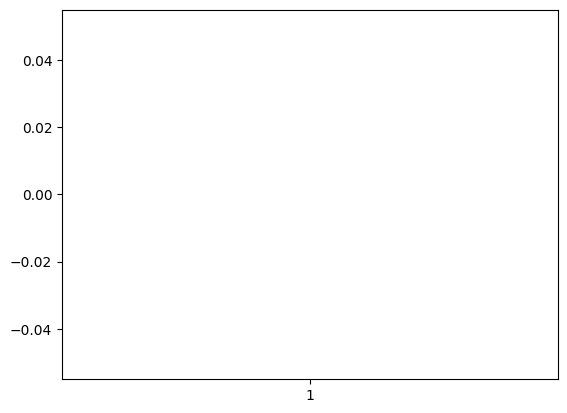

In [100]:
plt.boxplot(df['Type_of_vehicle'])

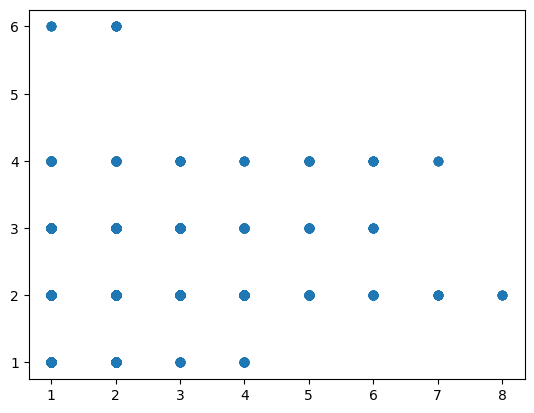

In [101]:
plt.scatter(df['Number_of_casualties'],df['Number_of_vehicles_involved'])

In [102]:
df['Educational_level'].unique()

array([ 4.,  6.,  0.,  1.,  2.,  5.,  7.,  3., nan])

In [103]:
#feature Engreeing
df['ana_of_Educational_level'] = df['Educational_level'].apply(lambda x: 1 if x >4 else 0)
df.head()


,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan,ana_of_Educational_level
2,1.0,4.0,Employee,1-2yr,0.0,3.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,4.0,Employee,5-10yr,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,6.0,Unknown,Vehicle with vehicle collision,14.0,3.0,1.0,1.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1.0,4.0,Employee,2-5yr,13.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.0,4.0,Employee,Above 10yr,1.0,3.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [104]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].apply(lambda x: 1 if x =='Employee' else 0)
df.head()

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan,ana_of_Educational_level
2,1.0,4.0,1,1-2yr,0.0,3.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,4.0,1,5-10yr,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,6.0,0,Vehicle with vehicle collision,14.0,3.0,1.0,1.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1.0,4.0,1,2-5yr,13.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.0,4.0,1,Above 10yr,1.0,3.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [105]:
df['Driving_experience'] = df['Driving_experience'].apply(lambda x: 1 if x =='Above 10yr' else 0)
df.head()

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan,ana_of_Educational_level
2,1.0,4.0,1,0,0.0,3.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,4.0,1,0,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,6.0,0,0,14.0,3.0,1.0,1.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1.0,4.0,1,0,13.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.0,4.0,1,1,1.0,3.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

(array([1058.,    0., 4756.,    0.,  855.,    0.,  188.,    0.,    0.,
          17.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

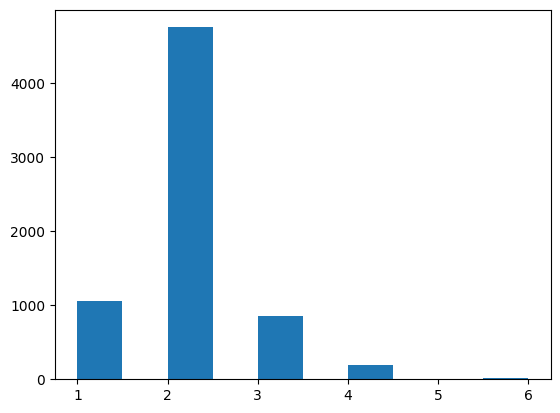

In [106]:
plt.hist(df['Number_of_vehicles_involved'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79bf9d2f2410>,
 'caps': [<matplotlib.lines.Line2D at 0x79bf9d2f2950>,
 'boxes': [<matplotlib.lines.Line2D at 0x79bf9d2f2170>],
 'medians': [<matplotlib.lines.Line2D at 0x79bf9d2f2e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79bf9d2f3130>],
 'means': []}

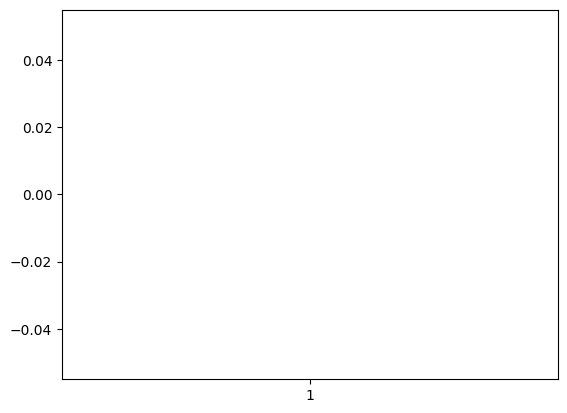

In [107]:
plt.boxplot(df['Educational_level'])

<Axes: xlabel='Sex_of_driver', ylabel='Type_of_vehicle'>

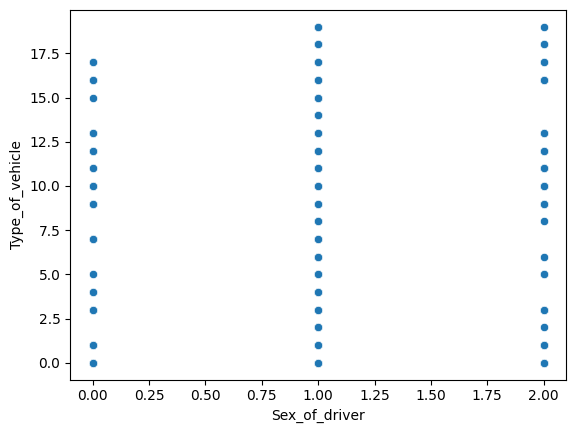

In [108]:
sns.scatterplot(data=df,x='Sex_of_driver',y='Type_of_vehicle')

In [109]:
df.sample(5)

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan,ana_of_Educational_level
7631,1.0,4.0,1,0,10.0,3.0,2.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
11759,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6552,1.0,5.0,0,0,4.0,3.0,2.0,1.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1053,1.0,0.0,1,0,10.0,3.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10193,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


<Axes: >

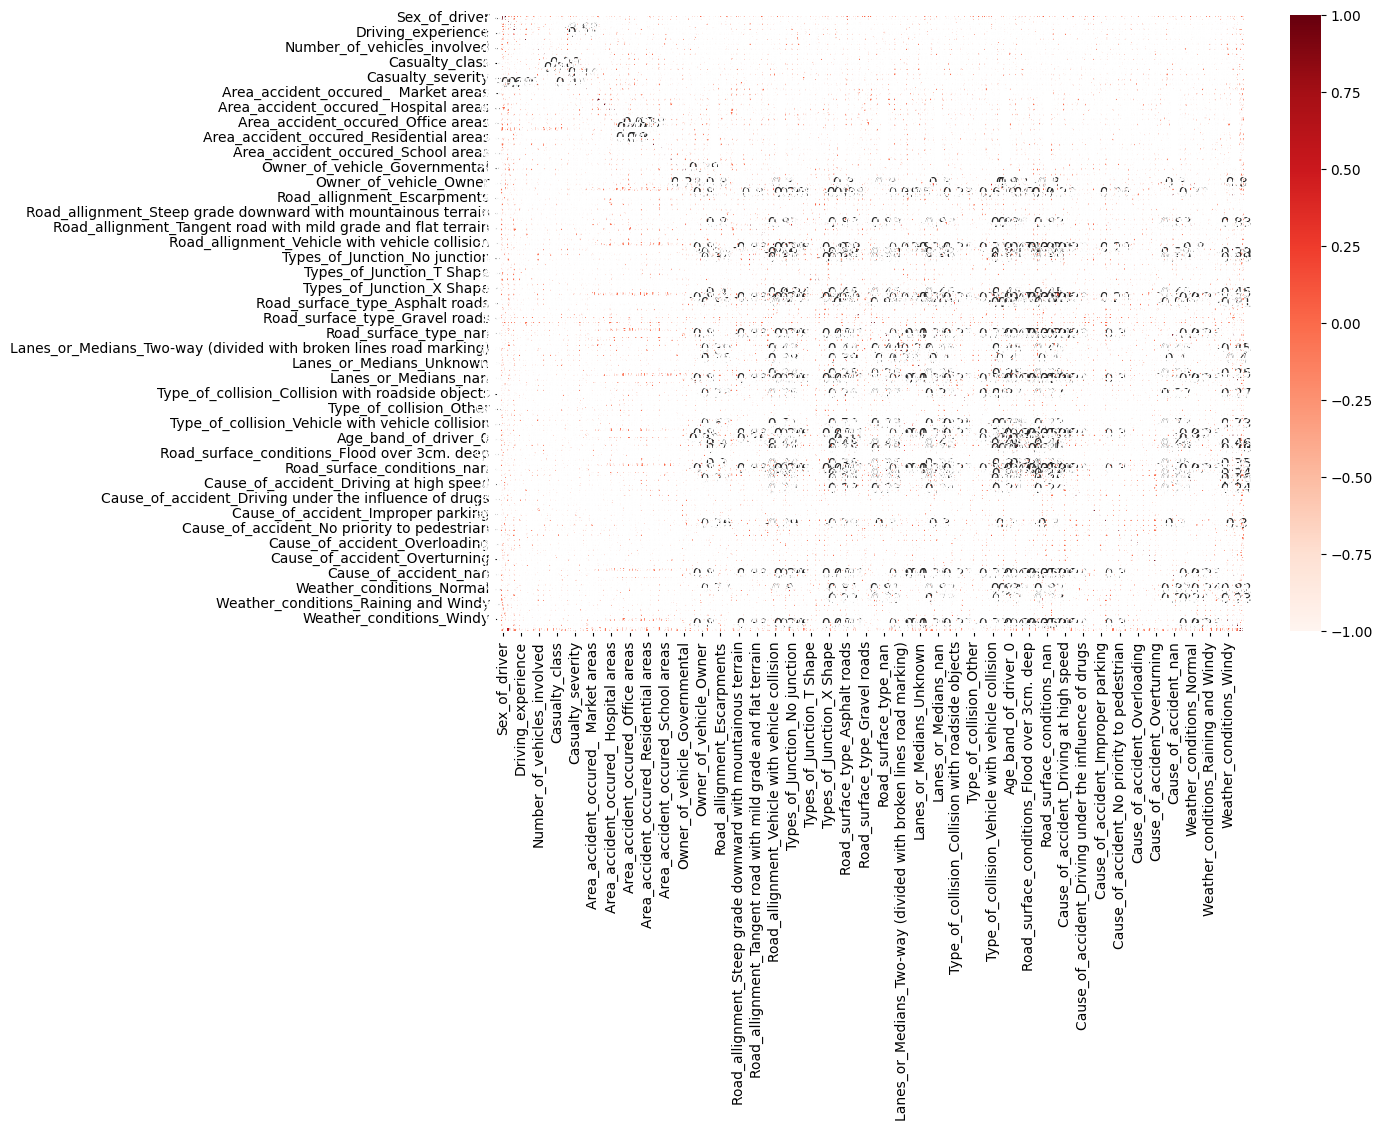

In [110]:
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation, annot=True, cmap='Reds', linewidths=0.5)

In [111]:
df.head()

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan,ana_of_Educational_level
2,1.0,4.0,1,0,0.0,3.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,4.0,1,0,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,6.0,0,0,14.0,3.0,1.0,1.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1.0,4.0,1,0,13.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.0,4.0,1,1,1.0,3.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<Axes: xlabel='Sex_of_driver', ylabel='Type_of_vehicle'>

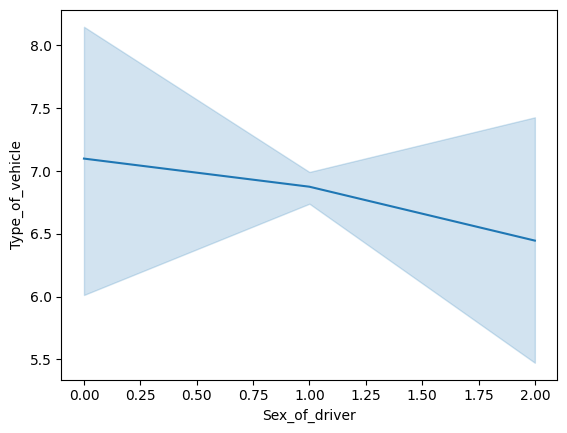

In [112]:
sns.lineplot(data=df, x="Sex_of_driver", y="Type_of_vehicle")

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Accident_severity'])
y=df['Accident_severity']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:
df

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan,ana_of_Educational_level
2,1.0,4.0,1,0,0.0,3.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,4.0,1,0,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,6.0,0,0,14.0,3.0,1.0,1.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1.0,4.0,1,0,13.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.0,4.0,1,1,1.0,3.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12306,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12307,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12308,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12311,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [118]:
df

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,...,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Weather_conditions_nan,ana_of_Educational_level
2,1.0,4.0,1,0,0.0,3.0,2.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,4.0,1,0,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,6.0,0,0,14.0,3.0,1.0,1.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1.0,4.0,1,0,13.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.0,4.0,1,1,1.0,3.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,1.0,7.0,1,0,5.0,0.0,4.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6861,1.0,2.0,1,0,17.0,3.0,2.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6867,1.0,2.0,1,0,10.0,3.0,3.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6869,1.0,4.0,1,0,3.0,3.0,2.0,1.0,7.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [116]:
df.dropna(inplace=True)

#### Logistic Regression

In [117]:
#lr=LogisticRegression()
#T_one1=lr.fit(x_train,y_train)
#y_pred1=T_one1.predict(x_test)
#score = T_one1.score(x_train, y_train)
#score
lr = LogisticRegression()
lr_tra=lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
#i make sure i remove  NaN but it does not remove

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt_tra= dt.fit(x_train, y_train)
dt_pred = dt_tra.predict(x_test)

#### Support Vector Machine (SVM)

In [ ]:
svm = SVC()
svm_tra=svm.fit(x_train,y_train)
svm_pred = svm_tra.predict(x_test)

#### K-Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()
knn_tra=knn.fit(x_train, y_train)
knn_pred = knn_tra.predict(x_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
print(confusion_matrix(y_test, lr_pred))
print(confusion_matrix(y_test, dt_pred))
print(confusion_matrix(y_test, svm_pred))
print(confusion_matrix(y_test, knn_pred))

In [ ]:
print("Logistic accuracy:", accuracy_score(y_test, lr_pred))
print("Decision tree accuracy:", accuracy_score(y_test, dt_pred))
print("SVM accuracy:", accuracy_score(y_test, svm_pred))
print("K-Neighbors accuracy:", accuracy_score(y_test, knn_pred))

In [ ]:
print("Logistic precision:", precision_score(y_test, lr_pred))
print("Logistic recall:", recall_score(y_test, lr_pred))

print("Decision tree precision:", precision_score(y_test, dt_pred))
print("Decision Tree recall:", recall_score(y_test, dt_pred))

print("SVM precision:", precision_score(y_test, svm_pred))
print("SVM recall:", recall_score(y_test, svm_pred))

print("K-Neighbors precision:", precision_score(y_test, knn_pred,))
print("K-Neighbors recall:", recall_score(y_test, knn_pred))

In [ ]:
print("Logistic F1 score:", f1_score(y_test, lr_pred))
print("Decision tree F1 score:", f1_score(y_test, dt_pred))
print("SVM F1 Score:", f1_score(y_test, svm_pred))
print("K-Neighbors F1 score:", f1_score(y_test, knn_pred))

In [ ]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,lr_pred, multi_class="ovr", average="micro"
)
from sklearn.metrics import roc_curve
fprr, tprr, thresholdsr = roc_curve( y_test,lr_pred)
plt.figure(figsize=(8, 6))
plt.plot(fprr, tprr, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.grid(True)
plt.show()

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [ ]:
# i dont notice any diff in accuracy
#the Limitations i notice that the Decision tree was hard and slow to excute
#i think using pipline will be better and accurte
